# Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_excel('/content/traffic_data.xlsx', sheet_name="Sheet1")

df = df[['Date_and_Time', 'In_Total', 'Out_Total', "Total_Total"]]

df['Date_and_Time'] = pd.to_datetime(df['Date_and_Time'])
df = df.set_index('Date_and_Time')

df.head()

,In_Total,Out_Total,Total_Total
Date_and_Time,,,
2023-01-01 00:00:00,118.0,1722.0,1840.0
2023-01-01 01:00:00,0.0,3061.0,3061.0
2023-01-01 02:00:00,0.0,2150.0,2150.0
2023-01-01 03:00:00,0.0,1577.0,1577.0
2023-01-01 04:00:00,1438.0,662.0,2100.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2023-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   In_Total     8376 non-null   float64
 1   Out_Total    8479 non-null   float64
 2   Total_Total  8544 non-null   float64
dtypes: float64(3)
memory usage: 273.8 KB


**Nomenklatur**

1. In_Total: Total Inbound
2. Out_Total: Total Outbound
3. Total_Total: Total Inbound Outbound



In [4]:
(df.Total_Total - (df.In_Total + df.Out_Total)).describe()

,0
count,8311.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


# Feature Engineering

In [5]:
df['Month'] = df.index.month
df['Date'] = df.index.day
df['Day'] = df.index.dayofweek
df['Hour'] = df.index.hour
df['Weekend'] = df.index.dayofweek.isin([5, 6])

df.sample(10)


,In_Total,Out_Total,Total_Total,Month,Date,Day,Hour,Weekend
Date_and_Time,,,,,,,,
2023-08-01 07:00:00,4737.0,548.0,5285.0,8,1,1,7,False
2023-06-14 21:00:00,2238.0,4924.0,7162.0,6,14,2,21,False
2023-08-10 20:00:00,1402.0,792.0,2194.0,8,10,3,20,False
2023-04-24 13:00:00,1448.0,1758.0,3206.0,4,24,0,13,False
2023-05-19 10:00:00,1010.0,188.0,1198.0,5,19,4,10,False
2023-08-04 19:00:00,3247.0,3468.0,6715.0,8,4,4,19,False
2023-11-13 15:00:00,2940.0,2759.0,5699.0,11,13,0,15,False
2023-12-02 14:00:00,2431.0,3279.0,5710.0,12,2,5,14,True
2023-09-26 07:00:00,4514.0,3805.0,8319.0,9,26,1,7,False


In [6]:
# Daftar tanggal merah 2023
holiday_list = [
    '2023-01-01', '2023-01-22', '2023-02-18', '2023-03-22',
    '2023-04-07', '2023-04-09', '2023-04-22', '2023-04-23',
    '2023-05-18', '2023-06-04', '2023-06-29', '2023-07-19',
    '2023-08-17', '2023-09-28', '2023-12-25'
]

holiday_list = pd.to_datetime(holiday_list).date
holiday_list

array([datetime.date(2023, 1, 1), datetime.date(2023, 1, 22),
       datetime.date(2023, 2, 18), datetime.date(2023, 3, 22),
       datetime.date(2023, 4, 7), datetime.date(2023, 4, 9),
       datetime.date(2023, 4, 22), datetime.date(2023, 4, 23),
       datetime.date(2023, 5, 18), datetime.date(2023, 6, 4),
       datetime.date(2023, 6, 29), datetime.date(2023, 7, 19),
       datetime.date(2023, 8, 17), datetime.date(2023, 9, 28),
       datetime.date(2023, 12, 25)], dtype=object)

In [7]:
df['Public_Holiday'] = df.index.to_series().dt.date.isin(holiday_list)
df.sample(10)

,In_Total,Out_Total,Total_Total,Month,Date,Day,Hour,Weekend,Public_Holiday
Date_and_Time,,,,,,,,,
2023-08-13 01:00:00,3181.0,1837.0,5018.0,8,13,6,1,True,False
2023-05-16 14:00:00,1194.0,3267.0,4461.0,5,16,1,14,False,False
2023-03-02 06:00:00,3920.0,1661.0,5581.0,3,2,3,6,False,False
2023-11-17 09:00:00,3904.0,3588.0,7492.0,11,17,4,9,False,False
2023-01-17 14:00:00,2633.0,2968.0,5601.0,1,17,1,14,False,False
2023-11-04 15:00:00,NaN,2901.0,2901.0,11,4,5,15,True,False
2023-11-29 01:00:00,913.0,786.0,1699.0,11,29,2,1,False,False
2023-03-29 21:00:00,5585.0,1941.0,7526.0,3,29,2,21,False,False
2023-02-17 08:00:00,3723.0,4113.0,7836.0,2,17,4,8,False,False


# Checking Missing Values

In [8]:
df.isna().sum()

,0
In_Total,384
Out_Total,281
Total_Total,216
Month,0
Date,0
Day,0
Hour,0
Weekend,0
Public_Holiday,0


In [9]:
missing_rows = df[df.isna().any(axis=1)]
missing_rows

,In_Total,Out_Total,Total_Total,Month,Date,Day,Hour,Weekend,Public_Holiday
Date_and_Time,,,,,,,,,
2023-01-01 06:00:00,NaN,NaN,NaN,1,1,6,6,True,True
2023-01-01 07:00:00,NaN,NaN,NaN,1,1,6,7,True,True
2023-01-01 08:00:00,NaN,NaN,NaN,1,1,6,8,True,True
2023-01-01 09:00:00,NaN,NaN,NaN,1,1,6,9,True,True
2023-01-01 11:00:00,NaN,1975.0,1975.0,1,1,6,11,True,True
...,...,...,...,...,...,...,...,...,...
2023-12-24 09:00:00,NaN,NaN,NaN,12,24,6,9,True,False
2023-12-31 06:00:00,NaN,NaN,NaN,12,31,6,6,True,False
2023-12-31 07:00:00,NaN,NaN,NaN,12,31,6,7,True,False


In [10]:
missing_rows_on_cfd = missing_rows[(missing_rows.index.dayofweek == 6) & (missing_rows.Hour.isin([6, 7, 8, 9, 10]))]
missing_rows_on_cfd

,In_Total,Out_Total,Total_Total,Month,Date,Day,Hour,Weekend,Public_Holiday
Date_and_Time,,,,,,,,,
2023-01-01 06:00:00,NaN,NaN,NaN,1,1,6,6,True,True
2023-01-01 07:00:00,NaN,NaN,NaN,1,1,6,7,True,True
2023-01-01 08:00:00,NaN,NaN,NaN,1,1,6,8,True,True
2023-01-01 09:00:00,NaN,NaN,NaN,1,1,6,9,True,True
2023-01-08 06:00:00,NaN,NaN,NaN,1,8,6,6,True,False
...,...,...,...,...,...,...,...,...,...
2023-12-24 09:00:00,NaN,NaN,NaN,12,24,6,9,True,False
2023-12-31 06:00:00,NaN,NaN,NaN,12,31,6,6,True,False
2023-12-31 07:00:00,NaN,NaN,NaN,12,31,6,7,True,False


# Boxplot

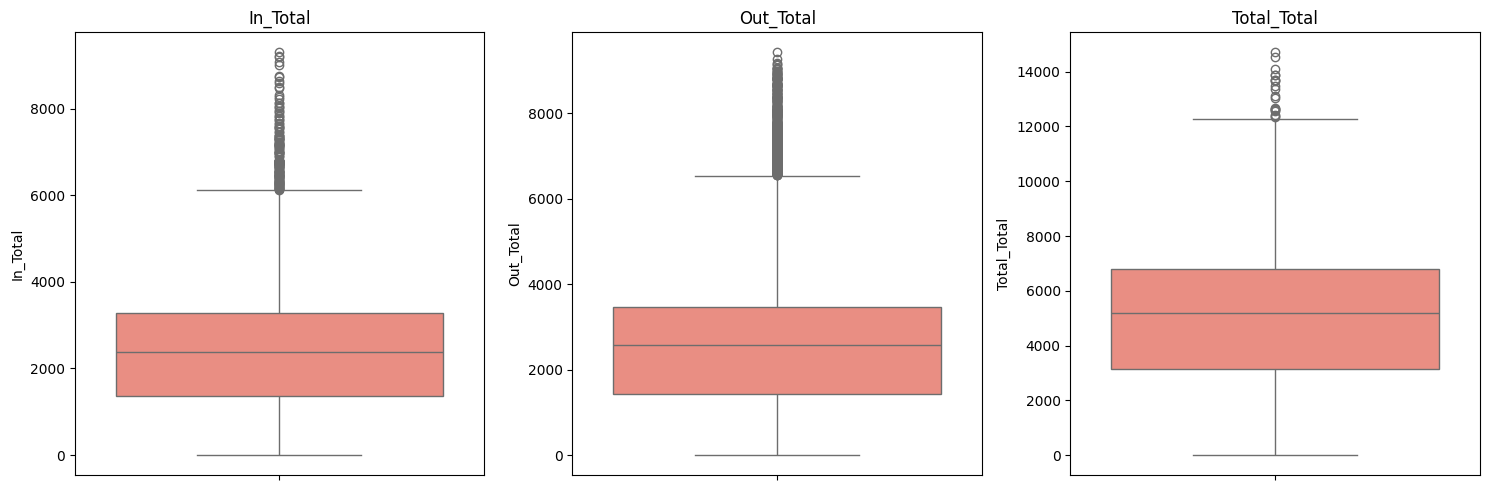

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.boxplot(df['In_Total'], color='salmon', ax=axes[0])
sns.boxplot(df['Out_Total'], color='salmon', ax=axes[1])
sns.boxplot(df['Total_Total'], color='salmon', ax=axes[2])

axes[0].set_title('In_Total')
axes[1].set_title('Out_Total')
axes[2].set_title('Total_Total')

plt.tight_layout()
plt.show()

# Save Data

In [12]:
df.drop(columns='Total_Total')
df.to_csv('Data MPDW Kelompok 1.csv', index=False)

In [13]:
df_des = df[df.index.month == 12]

In [14]:
df_des

,In_Total,Out_Total,Total_Total,Month,Date,Day,Hour,Weekend,Public_Holiday
Date_and_Time,,,,,,,,,
2023-12-01 00:00:00,1787.0,1564.0,3351.0,12,1,4,0,False,False
2023-12-01 01:00:00,1220.0,1221.0,2441.0,12,1,4,1,False,False
2023-12-01 02:00:00,940.0,790.0,1730.0,12,1,4,2,False,False
2023-12-01 03:00:00,512.0,386.0,898.0,12,1,4,3,False,False
2023-12-01 04:00:00,486.0,344.0,830.0,12,1,4,4,False,False
...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,201.0,1190.0,1391.0,12,31,6,19,True,False
2023-12-31 20:00:00,574.0,1673.0,2247.0,12,31,6,20,True,False
2023-12-31 21:00:00,416.0,2123.0,2539.0,12,31,6,21,True,False
